# Testing Other Imputation 
Sam Tomioka<br>
Oct 12, 2019

This notebook is converted to work in google colab.


1. median
2. knn
3. stochastic gradient descent
4. naive bayes
5. decision tree
6. gradient boosting

In [0]:
#setup
!git clone https://github.com/stomioka/phuse-tumor-ml.git
!pip install git+git://github.com/andirs/impyte.git
!mv phuse-tumor-ml phuse_tumor_ml

Cloning into 'phuse-tumor-ml'...
remote: Enumerating objects: 70, done.
remote: Counting objects: 100% (70/70), done.
remote: Compressing objects: 100% (55/55), done.
remote: Total 70 (delta 23), reused 59 (delta 12), pack-reused 0
Unpacking objects: 100% (70/70), done.
  Cloning git://github.com/andirs/impyte.git to /tmp/pip-req-build-zyeo82ti
  Running command git clone -q git://github.com/andirs/impyte.git /tmp/pip-req-build-zyeo82ti
  Created wheel for impyte: filename=impyte-0.1.0-cp36-none-any.whl size=21388 sha256=2d6f8357893bbae9c236b662cb8f0f78625133470261f44f3918ba0da682ef9d
  Stored in directory: /tmp/pip-ephem-wheel-cache-mfu7wsxt/wheels/65/16/30/1a24d053bf050146af36c12fdca5e3f2362d892226909931e4
Successfully built impyte


In [0]:
%load_ext autoreload
%autoreload 2
import os
os.chdir('phuse_tumor_ml/notebooks')


import pandas as pd
import numpy as np

import pickle
import xgboost as xgb
from xgboost import XGBClassifier
from scipy import stats
from impyte import impyte

import sklearn
from sklearn.model_selection import train_test_split\
, cross_val_score, GridSearchCV, StratifiedKFold, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, normalize

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score,roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier

from lib.myutil import *
from matplotlib import pyplot as plt
from matplotlib import cm as cm
import seaborn as sns
%matplotlib inline

print('sklearn=={}\nxgboost=={}'.format(sklearn.__version__,xgb.__version__))

/usr/local/lib/python3.6/dist-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


sklearn==0.21.3
xgboost==0.90


## 2.all imputations on knn model

----Training Method: 1----
----------------------
KNeighborsClassifier 0  
        imputation: median
           Parameters: {'leaf_size': 10, 'p': 1, 'weights': 'uniform'}
       Validation Acc: 0.8130434782608695
----Training Method: 2----
----------------------
KNeighborsClassifier 0  
        imputation: median
           Parameters: {'leaf_size': 30, 'p': 1, 'weights': 'distance'}
       Validation Acc: 0.9050359712230216
----Training Method: 3----
----------------------
KNeighborsClassifier 0  
        imputation: median
           Parameters: {'leaf_size': 10, 'p': 1, 'weights': 'distance'}
       Validation Acc: 0.8798252002913328
----Training Method: 1----
Computing NaN-patterns first ...

Scoring Threshold             Classification                Regression                    
                              0.85                          0.85                          

Pattern: Label                Score                         Estimator                     

Multi nans
1: SUM

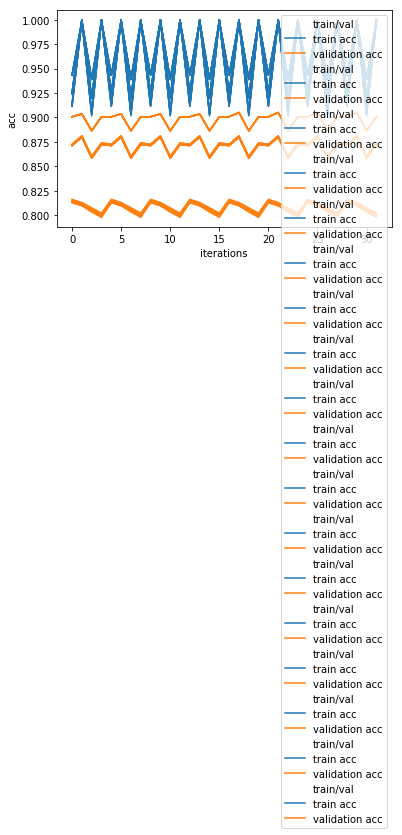

In [0]:
knn_grid_param = {
            'weights': ['uniform','distance']
            , 'p': [1,2]
            , 'leaf_size': np.arange(10,50,5)
}

def run_other_imputations(model, grid_param):
    imputation_methods=['median', 'knn','sgd','bayes','dt','gb']
    acc_lst_=[]
    model_lst =[]
    for method in imputation_methods:
        for i in range(3):
            i+=1
            score,  _,  trained_model,  _  = run_models(method=method, m=i, grid_param=grid_param, model=model)
            acc_lst_.append(score)
            model_lst.append(trained_model)
    return acc_lst_, model_lst

knn_acc_lst, knn_model_lst=run_other_imputations(model='knn'
                                                 , grid_param=knn_grid_param)    
    
    